### [예제 3_1] Missing Data 를 임의의 값으로 대체한 버전
### 오차역전파를 이용한 Kaggle Titanic Data 학습 및 Dicaprio, Winslet 생존 예측 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### pd.read_csv() 실행

In [2]:
# Load Kaggle Data as matrix
train_df = pd.read_csv('./titanic_train.csv')
test_df = pd.read_csv('./titanic_test.csv')
test_sub_df = pd.read_csv('./titanic_gender_submission.csv')

### DataFrame  확인

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### test_sub_df['Survived'] 열(column) 데이터를 test_df['Survived'] 열(column)로 추가함

In [6]:
test_df['Survived'] = test_sub_df['Survived']

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [7]:
test_df = test_df[ ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'] ]

test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### 각 데이터프레임의 Missing Data 및 Embarked 종류 확인

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [10]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train_df['Age'].median()

28.0

### Missing Data 처리
#### train_df['Age'] 는 median() 값으로 대체, train_df['Embarked'] 는 가장 빈도수가 많은 'S' 로 대체 
#### 그 외의 column 은 딥러닝 학습에 중요하지 않기 때문에 NaN 값 변경하지 않음

In [12]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

train_df['Embarked'].fillna('S', inplace=True)

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
print(test_df['Age'].median())
print(test_df['Fare'].mean())

27.0
35.6271884892086


### test_df['Age'] 열의 NaN 또한 median() 대체, test_df['Fare'] 는 mean() 대체

In [14]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

test_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 딥러닝 학습을 위한 matrix 생성

In [15]:
train_csv_data = train_df.values
test_csv_data = test_df.values


print(type(train_csv_data), train_csv_data.shape)
print(type(test_csv_data), test_csv_data.shape)


<class 'numpy.ndarray'> (891, 12)
<class 'numpy.ndarray'> (418, 11)


### Data Conversion (문자 => 숫자)

In [16]:
# train_csv_data 에서 male -> 1, female -> 0
for i in range(len(train_csv_data)):
    
    if train_csv_data[i, 4] == 'male':
        
        train_csv_data[i, 4] = 1.0
    
    else:
        
        train_csv_data[i, 4] = 0.0
        
# test_csv_data 에서 male -> 1, female -> 0
for i in range(len(test_csv_data)):
    
    if test_csv_data[i, 4] == 'male':
        
        test_csv_data[i, 4] = 1.0
    
    else:
        
        test_csv_data[i, 4] = 0.0

In [17]:
# train_csv_data 에서 Embarked, Empty -> 0, S -> 1, C -> 2, Q -> 3
for i in range(len(train_csv_data)):
    
    if train_csv_data[i, 11] == 'S':
        
        train_csv_data[i, 11] = 1.0
        
    elif train_csv_data[i, 11] == 'C':
        
        train_csv_data[i, 11] = 2.0
        
    elif train_csv_data[i, 11] == 'Q':
        
        train_csv_data[i, 11] = 3.0
        

# test_csv_data 에서 Embarked, Empty -> 0, S -> 1, C -> 2, Q -> 3
for i in range(len(test_csv_data)):
    
    if test_csv_data[i, 10] == 'S':
        
        test_csv_data[i, 10] = 1.0
        
    elif test_csv_data[i, 10] == 'C':
        
        test_csv_data[i, 10] = 2.0
        
    elif test_csv_data[i, 10] == 'Q':
        
        test_csv_data[i, 10] = 3.0

### training data 생성에 필요한 칼럼 재 확인

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# training input data / training_target_data 생성
# Embarked 항목은 변경하였지만 생존에 영향을 미치지 않을것으로 판단하였기에 학습데이터, 테스트데이터에 추가 하지 않음

training_input_data = train_csv_data[ : , [ 2, 4, 5, 6, 7, 9 ] ].astype('float32')  # Pclass, Sex, Age, SibSp, Parch, Fare

training_target_data = train_csv_data[ :, 1 ].astype('float32')  # Survived

print('training_input_data.shape = ', training_input_data.shape, ', training_target_data.shape = ', training_target_data.shape)

print(training_input_data[1])
print(training_target_data[1])

training_input_data.shape =  (891, 6) , training_target_data.shape =  (891,)
[ 1.      0.     38.      1.      0.     71.2833]
1.0


### test data 생성에 필요한 칼럼 재 확인

In [20]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [21]:
# test_input_data / test_target_data 생성
# Embarked 항목은 변경하였지만 생존에 영향을 미치지 않을것으로 판단하였기에 학습데이터, 테스트데이터에 추가 하지 않음

test_input_data = test_csv_data[ : , [ 2, 4, 5, 6, 7, 9] ].astype('float32')  # Pclass, Sex, Age, SibSp, Parch, Fare

test_target_data = test_csv_data[ :, 1 ].astype('float32')

print("test_input_data.shape = ", test_input_data.shape, ", test_target_data.shape = ", test_target_data.shape)

print(test_input_data[1])
print(test_target_data[1])

test_input_data.shape =  (418, 6) , test_target_data.shape =  (418,)
[ 3.  0. 47.  1.  0.  7.]
1.0


# 오차역전파를 위한 코드 구현

In [22]:
# sigmoid 함수 정의
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [23]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class Kaggle_Titanic:
    
    def __init__(self, name, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 =  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
        # name 초기화
        self.name = name
        
        print(self.name, " object is created !!!")
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        
        y = self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        y = self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )    
    
    # accuracy method
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        temp_list = []
        
        for index in range(len(input_data)):
            
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            # dtype=np.float32 해주지 않으면 sigmoid 에서 Numpy AttributeError: 'float' object has no attribute 'exp' 발생함
            # 해결방법 소스
            # https://stackoverflow.com/questions/18557337/numpy-attributeerror-float-object-has-no-attribute-exp/18568056
            (real_val, predicted_num) = self.predict(np.array(input_data[index], dtype=np.float32, ndmin=2)) 
            
            if predicted_num == target_data[index]:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(target_data[index])
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        accuracy_result = len(matched_list) / len(input_data)
            
        #print("Accuracy => ", accuracy_result)
            
        return accuracy_result, index_label_prediction_list
    
    # train method
    def train(self, input_data, target_data):   
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
                        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨     
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        y = A3 = sigmoid(Z3)
        
        if y >= 0.5:
            predicted_num = 1
        else:
            predicted_num = 0
    
        return y, predicted_num

In [24]:
#hyper-parameter
i_nodes = training_input_data.shape[1]    # input nodes 개수
h1_nodes = 50  # hidden nodes 개수, 20개, 1e-4 OK
o_nodes = 1    # output nodes 개수

lr = 1e-4     # learning rate

epochs = 200   # 반복횟수

# 손실함수 값을 저장할 list 생성
loss_val_list = []

train_acc_list = []
validation_acc_list = []

# Kaggle_Titanic 객체 생성
titanic_obj = Kaggle_Titanic('Titanic', i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using BackPropagation...")


start_time = datetime.now()

for i in range(epochs):
    
    for index in range(len(training_input_data)):
        
        input_data = training_input_data[index]
        target_data = training_target_data[index]
        
        # dtype=np.float32 해주지 않으면 sigmoid 에서 Numpy AttributeError: 'float' object has no attribute 'exp' 발생함
        # 해결방법 소스
        # https://stackoverflow.com/questions/18557337/numpy-attributeerror-float-object-has-no-attribute-exp/18568056
        titanic_obj.train( np.array(input_data, dtype=np.float32, ndmin=2), np.array([target_data], dtype=np.float32, ndmin=2) )  # 행렬로 입력
  
    
    cur_loss_val = titanic_obj.loss_val()
    print("epochs = ", i+1, "loss value = ", cur_loss_val)    
    
    (train_accuracy_val, index_label_prediction_list) = titanic_obj.accuracy(training_input_data, training_target_data)
    (validation_accuracy_val, index_label_prediction_list) = titanic_obj.accuracy(test_input_data, test_target_data)
    
    train_acc_list.append(train_accuracy_val)
    validation_acc_list.append(validation_accuracy_val)
    
    
    # 손실함수 값 저장
    loss_val_list.append(cur_loss_val) 
        

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Titanic  object is created !!!
Neural Network Learning using BackPropagation...
epochs =  1 loss value =  1.659014231265998
epochs =  2 loss value =  1.5643879997998116
epochs =  3 loss value =  1.4713533543232031
epochs =  4 loss value =  1.3809461708773694
epochs =  5 loss value =  1.2941966730012668
epochs =  6 loss value =  1.2120437117236602
epochs =  7 loss value =  1.135252371207875
epochs =  8 loss value =  1.0643533569780967
epochs =  9 loss value =  0.999616937650493
epochs =  10 loss value =  0.941063646356893
epochs =  11 loss value =  0.8885037847498745
epochs =  12 loss value =  0.8415923485845617
epochs =  13 loss value =  0.7998862185889233
epochs =  14 loss value =  0.7628943491069652
epochs =  15 loss value =  0.7301164904477361
epochs =  16 loss value =  0.7010698175278469
epochs =  17 loss value =  0.6753050791845447
epochs =  18 loss value =  0.6524147421402892
epochs =  19 loss value =  0.6320355900349148
epochs =  20 loss value =  0.6138478158256365
epochs =  21 

epochs =  176 loss value =  0.29774795071477317
epochs =  177 loss value =  0.29725680015991063
epochs =  178 loss value =  0.2967702303435155
epochs =  179 loss value =  0.2962881874951791
epochs =  180 loss value =  0.2958106185351106
epochs =  181 loss value =  0.2953374710173613
epochs =  182 loss value =  0.2948686930769269
epochs =  183 loss value =  0.2944042333808916
epochs =  184 loss value =  0.29394404108371
epochs =  185 loss value =  0.2934880657866695
epochs =  186 loss value =  0.29303625750153917
epochs =  187 loss value =  0.29258856661833993
epochs =  188 loss value =  0.29214494387715834
epochs =  189 loss value =  0.2917053403438735
epochs =  190 loss value =  0.2912697073896375
epochs =  191 loss value =  0.29083799667393373
epochs =  192 loss value =  0.2904101601310135
epochs =  193 loss value =  0.2899861499594934
epochs =  194 loss value =  0.28956591861490166
epochs =  195 loss value =  0.2891494188049317
epochs =  196 loss value =  0.28873660348718694
epochs 

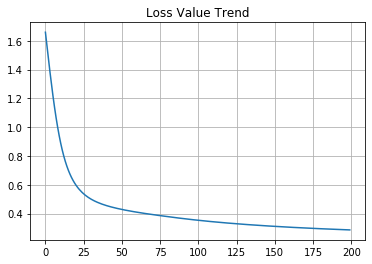

In [25]:
plt.title('Loss Value Trend')
plt.grid()
plt.plot(loss_val_list)
plt.show()

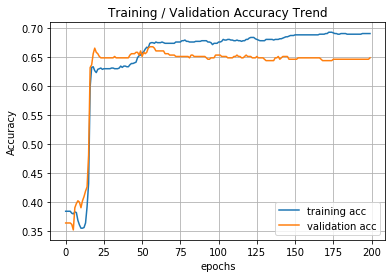

In [26]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_acc_list, label='training acc')
plt.plot(validation_acc_list, label='validation acc')
plt.legend(loc='best')

plt.show()

In [27]:
(accuracy_val, index_label_prediction_list) = titanic_obj.accuracy(test_input_data, test_target_data)

print('Accuracy = ', 100*np.round(accuracy_val, 3), ' %')

Accuracy =  64.8  %


In [28]:
# 디카프리오, 윈슬렛 예측
dicaprio = np.array([3., 1., 19., 0., 0.,   5.]).reshape(1,6)    # Pclass, Sex, Age, SibSp, Parch, Fare
winslet  = np.array([1., 0., 17., 1., 2., 100.]).reshape(1,6)    # Pclass, Sex, Age, SibSp, Parch, Fare

(d_probability, alive_or_dead) = titanic_obj.predict(dicaprio)

print(d_probability, alive_or_dead)

(w_probability, alive_or_dead) = titanic_obj.predict(winslet)

print(w_probability, alive_or_dead)

[[0.25085185]] 0
[[0.65948331]] 1
